# Pràctica 2: Neteja i anàlisi de dades

## 1. Dataset

El dataset emprat en aquesta pràctica és el generat a la PRA1 de l'assignatura, on vam recollir les dades de la web de Fotocasa dels pisos en lloguer a la ciutat de Barcelona (a data d'octubre de 2020), mitjançant scraping.

L'objectiu de l'anàlisi de les dades d'aquest dataset és respondre a les següents qüestions:

- Quines són les variables del dataset que influeixen de manera més significativa sobre el preu?
- Hi ha diferències significatives en els preus de lloguer entre els diferents barris de la ciutat?
- Hi ha diferències significatives en els preus de lloguer entre les diferents agències?
- Es pot crear un model de regressió que permeti predir el preu d'un habitatge en base a les seves característiques?

## 2. Selecció de dades

Primerament, determinarem quines són les variables del nostre dataset i el seu tipus. Seguidament, eliminarem aquelles que no aportin informació útil de cara a la nostra anàlisi. Finalment, farem una eliminació de files duplicades.

In [337]:
import pandas as pd

apartments = pd.read_csv('../csv/data_final.csv')

### Eliminació de dimensions

In [338]:
apartments.dtypes

id                       int64
address                 object
bathrooms                int64
building_subtype        object
building_type           object
conservation_state     float64
date                    object
discount                 int64
floor_elevator           int64
is_new_construction       bool
latitude               float64
link                    object
longitude              float64
price                  float64
realestate              object
realestate_id            int64
rooms                    int64
sqft_m2                  int64
neighbourhood           object
neighb_meanprice       float64
dtype: object

Donats els objectius de la nostra anàlisi, hi ha certes columnes del dataset que podem eliminar:

- __id__, que simplement conté l'índex de la fila dintre del dataset, de moment la deixem per si hem de sel·leccionar files per aquest índex.
- __address__, que conté la direcció del pis. Ja tenim el barri disponible a la columna __neighbourhood__ i per tant, aquest camp aporta informació innecessària a la nostra anàlisi.
- __date__, que conté la data en la que es va recollir la mostra. Solament la vam recollir un dia específic i per tant, no aporta cap informació rellevant a l'anàlisi actual.
- __realestate_id__, que conté l'identificador de l'agència que oferta el pis en lloguer. Ens preferim quedar amb el nom ja que ens permetrà visualitzar la informació de manera més clara

In [339]:
apartments = apartments.drop(columns=['address', 'date', 'realestate_id'])

### Eliminació de files duplicades

L'eliminació de files duplicades la portarem a terme en base a la variable __link__. Si tenim dues o més observacions del mateix pis de la web de Fotocasa, ens quedarem únicament amb la primera:

In [340]:
apartments.loc[apartments.duplicated('link')]

,id,bathrooms,building_subtype,building_type,conservation_state,discount,floor_elevator,is_new_construction,latitude,link,longitude,price,realestate,rooms,sqft_m2,neighbourhood,neighb_meanprice
39,39,1,Apartment,Flat,NaN,0,0,False,41.38071,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,0,35,el raval,14.323614
40,40,1,Apartment,Flat,NaN,0,0,False,41.38071,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,0,35,el raval,14.323614
41,41,1,Apartment,Flat,NaN,0,0,False,41.38071,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,0,35,el raval,14.323614
42,42,1,Apartment,Flat,NaN,0,0,False,41.38071,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,0,35,el raval,14.323614
43,43,1,Apartment,Flat,NaN,0,0,False,41.38071,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,0,35,el raval,14.323614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,11803,2,Attic,Flat,1.0,200,1,False,41.39394,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.121359,3700.0,Stipek Ferrer Premium Properties,4,280,sarrià,16.866645
11804,11804,2,Attic,Flat,1.0,200,1,False,41.39394,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.121359,3700.0,Stipek Ferrer Premium Properties,4,280,sarrià,16.866645
12007,12007,5,Flat,Flat,2.0,0,1,False,41.39514,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.141838,5300.0,Max Ricart,6,280,sant gervasi - galvany,15.275452
12061,12061,2,Apartment,Flat,NaN,594,0,False,41.39498,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.147670,6073.0,Homelike,4,100,sant gervasi - galvany,15.275452


In [341]:
apartments = apartments.drop_duplicates('link')

### Tipus de dades

Si observem els tipus de dades anteriors, es pot veure com __conservation_state__, __building_subtype__ y __building_type__ poden ser variables categòriques, o com __floor_elevator__ és en realitat una variable booleana. Podem aplicar la conversió sobre aquestes variables amb l'objectiu de millorar l'anàlisi:

In [342]:
apartments = apartments.astype({
    'conservation_state': 'category',
    'building_subtype': 'category',
    'building_type': 'category',
    'floor_elevator': 'bool',
    'neighbourhood':'category'
})

## 3. Neteja de dades

### Valors buits

Anem a determinar quins són els valors buits de cadascuna de les columnes:

In [343]:
apartments.isna().sum()

id                        0
bathrooms                 0
building_subtype          0
building_type             0
conservation_state     5340
discount                  0
floor_elevator            0
is_new_construction       0
latitude                  0
link                      0
longitude                 0
price                     4
realestate              106
rooms                     0
sqft_m2                   0
neighbourhood             1
neighb_meanprice          1
dtype: int64

Veiem que molts habitatges no tenen informació sobre l'estat de conservació. Omplirem amb -1 aquells que no en tinguin:

In [344]:
apartments['conservation_state'] = apartments['conservation_state'].cat.add_categories(-1)

apartments['conservation_state'] = apartments['conservation_state'].fillna(-1)

Donat que volem respondre a la pregunta de si hi ha diferències de preu entre les diferents agències, eliminem les observacions que no tenen agència:

In [345]:
apartments = apartments.dropna(subset=['realestate'])
apartments.isna().sum()

id                     0
bathrooms              0
building_subtype       0
building_type          0
conservation_state     0
discount               0
floor_elevator         0
is_new_construction    0
latitude               0
link                   0
longitude              0
price                  4
realestate             0
rooms                  0
sqft_m2                0
neighbourhood          1
neighb_meanprice       1
dtype: int64

Pel que fa al preu, es tracta de poques observacions que tenen un valor buit per aquesta variable. Com que l'objectiu d'aquesta anàlisi gira entorn al preu, decidim inserir la informació de forma manual consultant la web de Fotocasa:

In [346]:
apartments[apartments.price.isna()]['link']

12154    /es/alquiler/vivienda/barcelona-capital/calefa...
12155    /es/alquiler/vivienda/barcelona-capital/ascens...
12156    /es/alquiler/vivienda/barcelona-capital/aire-a...
12157    /es/alquiler/vivienda/barcelona-capital/aire-a...
Name: link, dtype: object

Les quatre observacions, un cop consultat el link al web de Fotocasa, corresponen a habitatges que no tenen preu, indicant-ho al web com pre "a consultar". Com necessitem treballar amb els preus, procedirem a eliminiar aquestes dades.

In [347]:
apartments = apartments.dropna(subset=['price'])

Finalment, ens queda omplir manualment les observacions que no tenen barri, de nou, mitjançant l'enllaç de Fotocasa per veure si podem determinar aquesta informació:

In [348]:
apartments[apartments.neighbourhood.isna()]

,id,bathrooms,building_subtype,building_type,conservation_state,discount,floor_elevator,is_new_construction,latitude,link,longitude,price,realestate,rooms,sqft_m2,neighbourhood,neighb_meanprice
1384,1384,1,Flat,Flat,-1.0,0,False,False,41.35395,/es/alquiler/vivienda/barcelona-capital/la-mar...,2.148532,750.0,FINCAS LAFONT,3,70,NaN,NaN


Veiem que es correspon amb el barri de "La marina de Port", així que li assignem el preu mitjà d'aquest barri.

In [349]:
mean_price_marina = float(apartments[apartments['neighbourhood']=='la marina de port'].head(1)['neighb_meanprice'])

apartments.loc[apartments.id ==1384, 'neighbourhood'] = 'la marina de port'
apartments.loc[apartments.id ==1384, 'neighb_meanprice'] = mean_price_marina



Podem observar que ara el dataset no té valors buits:

In [350]:
apartments.isna().sum()

id                     0
bathrooms              0
building_subtype       0
building_type          0
conservation_state     0
discount               0
floor_elevator         0
is_new_construction    0
latitude               0
link                   0
longitude              0
price                  0
realestate             0
rooms                  0
sqft_m2                0
neighbourhood          0
neighb_meanprice       0
dtype: int64

Podem eliminar l'id:

In [351]:
apartments = apartments.drop(columns=['id'])

### Outliers

El que primer farem, serà visualitzar a gràfics de tipus boxplot cadascuna de les variables quantitatives per tal de determinar si tenim o no outliers:

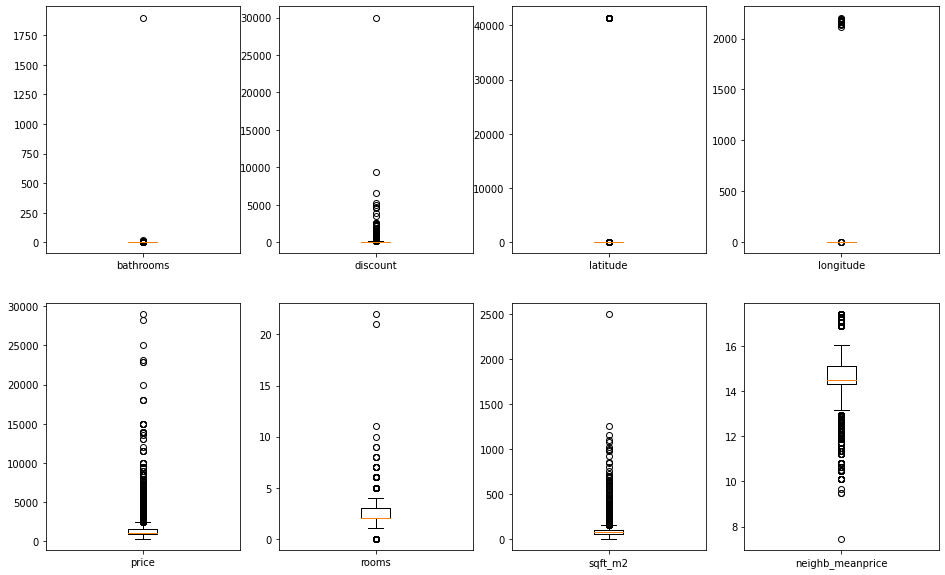

In [352]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure(figsize=(16,10))
numeric_attributes = apartments.select_dtypes(include=np.number).columns
for idx, column in enumerate(numeric_attributes):
    ax = fig.add_subplot(2, math.ceil(len(numeric_attributes)/2), idx+1)
    ax.boxplot(apartments[[column]], labels=[column])

Sembla evident que tenim prou valors extrems al dataset per a cadascuna de les variables quantitatives. El que cal és determinar si aquests valors són reals i per tant els hem de tenir en compte a l'anàlisi, o d'altra banda podem eliminar aquells que considerem outliers.

#### Price
Si seleccionam els 5 preus més alts del dataset, podem comprovar com es tracta de valors vàlids quan accedim al detall a la pàgina de Fotocasa:

In [353]:
apartments.sort_values('price', ascending=False).head()[['link', 'rooms', 'bathrooms', 'realestate', 'sqft_m2', 'price']]

,link,rooms,bathrooms,realestate,sqft_m2,price
12153,/es/alquiler/vivienda/barcelona-capital/aire-a...,4,4,VIP PISOS,600,29000.0
12152,/es/alquiler/vivienda/barcelona-capital/aire-a...,8,7,Homelike,550,28279.0
12151,/es/alquiler/vivienda/barcelona-capital/aire-a...,21,21,ENGEL & VOELKERS,2500,25000.0
12150,/es/alquiler/vivienda/barcelona-capital/aire-a...,3,2,Homelike,85,23092.0
12149,/es/alquiler/vivienda/barcelona-capital/aire-a...,2,1,Homelike,54,22839.0


Sembla per tant que existeixen uns pocs pisos al dataset amb preus molt elevants, i característiques com nombre d'habitacions, metres quadrats o nombre de banys amb valors que tot i semblar extrems, són vàlids. Per aquest motiu, decidim __mantenir__ aquestes observacions per tal de dur a terme l'anàlisi de dades.

#### Latitude i Longitude

Si s'examinen les variables latitude i longitude, hi veiem valors sospitosos. La latitud és un valor que oscil·la entre -90 i 90, mentre que la longitud ho fa entre -180 i 180. Per tant, qualsevol observació d'aquestes variables fora d'aquest rang es podria considerar un outlier. D'altra banda, esperem que tots els habitages es trobin a la ciutat de Barcelona, per tant, que tinguin coordenades molt semblants.

In [354]:
apartments[(apartments['latitude'] > 90) | (apartments['latitude'] < -90)].sort_values('latitude', ascending=False).head(100)[['link', 'latitude', 'longitude', 'neighbourhood', 'price']]

,link,latitude,longitude,neighbourhood,price
3979,/es/alquiler/vivienda/barcelona-capital/aire-a...,41436.0,2.173259,porta,950.0
4177,/es/alquiler/vivienda/barcelona-capital/aire-a...,41428.0,2.189229,la sagrera,955.0
1266,/es/alquiler/vivienda/barcelona-capital/ascens...,41424.0,2.151020,la teixonera,750.0
3694,/es/alquiler/vivienda/barcelona-capital/aire-a...,41422.0,2.188695,sant antoni,910.0
6027,/es/alquiler/vivienda/barcelona-capital/calefa...,41418.0,2.171966,el guinardó,1100.0
...,...,...,...,...,...
4181,/es/alquiler/vivienda/barcelona-capital/aire-a...,41373.0,2.157460,el poble sec - aei parc montjuïc,955.0
6920,/es/alquiler/vivienda/barcelona-capital/aire-a...,41372.0,2.138111,la bordeta,1200.0
7003,/es/alquiler/vivienda/barcelona-capital/aire-a...,41372.0,2.127435,sants,1200.0
2567,/es/alquiler/vivienda/barcelona-capital/aire-a...,41372.0,2.147444,la font de la guatlla,850.0


Pel que fa a __latitude__, sembla que existeix un error a l'hora d'interpretar els decimals. Les observacions que tenim pels pisos de Barcelona, tenen una latitud que oscil·la entre els següents valors:

In [355]:
apartments[(apartments['latitude']) < 90]['latitude'].max()

41.46262

In [356]:
apartments[(apartments['latitude']) < 90]['latitude'].min()

41.35395

Podem corregir fàcilment els valors incorrectes, ja que tots són superiors a 41370, dividint  el valor de __latitude__ entre 1000 per a aquestes observacions:

In [357]:
apartments.loc[apartments['latitude'] > 41370, 'latitude'] = apartments['latitude']/1000
apartments.sort_values('latitude', ascending=False).head(10)[['link', 'latitude', 'longitude', 'neighbourhood', 'price']]

,link,latitude,longitude,neighbourhood,price
228,/es/alquiler/vivienda/barcelona-capital/terraz...,41.46262,2.180195,ciutat meridiana,600.0
15,/es/alquiler/vivienda/barcelona-capital/terraz...,41.45524,2.174660,torre baró,490.0
609,/es/alquiler/vivienda/barcelona-capital/terraz...,41.45345,2.190106,la trinitat vella,675.0
978,/es/alquiler/vivienda/barcelona-capital/amuebl...,41.45231,2.191007,la trinitat vella,715.0
509,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.45208,2.192924,la trinitat vella,650.0
578,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.45131,2.190549,la trinitat vella,664.0
296,/es/alquiler/vivienda/barcelona-capital/terraz...,41.45129,2.189722,la trinitat vella,647.0
222,/es/alquiler/vivienda/barcelona-capital/terraz...,41.45118,2.189822,la trinitat vella,600.0
1344,/es/alquiler/vivienda/barcelona-capital/no-amu...,41.45047,2.191933,la trinitat vella,750.0
7797,/es/alquiler/vivienda/barcelona-capital/calefa...,41.44968,2.190399,la trinitat vella,1250.0


Podem aplicar el mateix procés per al camp __longitude__:

In [358]:
apartments[(apartments['longitude'] > 180) | (apartments['longitude'] < -180)].sort_values('longitude', ascending=False).head(100)[['link', 'latitude', 'longitude', 'neighbourhood', 'price']]

,link,latitude,longitude,neighbourhood,price
4023,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.39861,2206.0,el poblenou,950.0
1430,/es/alquiler/vivienda/barcelona-capital/ascens...,41.41937,2188.0,navas,750.0
3229,/es/alquiler/vivienda/barcelona-capital/calefa...,41.38230,2188.0,la barceloneta,900.0
2042,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.43369,2186.0,sant andreu,800.0
411,/es/alquiler/vivienda/barcelona-capital/sant-p...,41.38697,2177.0,"sant pere, santa caterina i la ribera",650.0
4265,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.38697,2177.0,"sant pere, santa caterina i la ribera",975.0
5685,/es/alquiler/vivienda/barcelona-capital/calefa...,41.40808,2169.0,el baix guinardó,1090.0
5683,/es/alquiler/vivienda/barcelona-capital/calefa...,41.40816,2169.0,el baix guinardó,1090.0
2899,/es/alquiler/vivienda/barcelona-capital/ascens...,41.37688,2168.0,el raval,855.0
896,/es/alquiler/vivienda/barcelona-capital/can-ba...,41.41630,2164.0,can baró,700.0


Les observacions pels pisos de Barcelona tenen una longitud que oscil·la entre els següents valors:

In [359]:
apartments[(apartments['longitude']) < 180]['longitude'].max()

2.224126

In [360]:
apartments[(apartments['longitude']) < 180]['longitude'].min()

2.0915220000000003

De nou, si dividim els valors de __longitude__ superiors a 2110 entre 1000, corregirem els valors d'aquestes observacions:

In [361]:
apartments.loc[apartments['longitude'] > 2110, 'longitude'] = apartments['longitude']/1000
apartments.sort_values('longitude', ascending=False).head(10)[['link', 'latitude', 'longitude', 'neighbourhood', 'price']]

,link,latitude,longitude,neighbourhood,price
8502,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41129,2.224126,el besòs i el maresme,1350.0
10272,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41315,2.222797,el besòs i el maresme,1800.0
11252,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41155,2.221454,el besòs i el maresme,2600.0
10433,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41163,2.220950,el besòs i el maresme,1900.0
10232,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41353,2.220937,el besòs i el maresme,1800.0
9594,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41261,2.220891,el besòs i el maresme,1600.0
8157,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41361,2.220773,el besòs i el maresme,1300.0
11048,/es/alquiler/vivienda/barcelona-capital/calefa...,41.41253,2.220563,el besòs i el maresme,2400.0
8611,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.40981,2.220171,diagonal mar i el front marítim del poblenou,1400.0
11098,/es/alquiler/vivienda/barcelona-capital/aire-a...,41.41261,2.220109,el besòs i el maresme,2500.0


#### Bathrooms

Per a aquest camp, tot i que hem comentat que hi ha valors alts que considerem vàlids, si observem el boxplot veiem que hi ha una observació que té un valor molt extrem:

In [362]:
apartments[apartments['bathrooms'] > 100][['link', 'bathrooms', 'rooms', 'sqft_m2', 'price']]


,link,bathrooms,rooms,sqft_m2,price
10875,/es/alquiler/vivienda/barcelona-capital/aire-a...,1901,3,135,2200.0


A la web de Fotocasa, s'indica també aquest valor. Tot i això, no és lògic tenir 1901 banys a un pis de 135 metres quadrats de 3 habitacions i per tant, decidim eliminar aquesta observació:

In [363]:
apartments = apartments.drop(index=10875)

In [364]:
apartments.bathrooms.max()

21

### Fitxer csv amb les dades finals a analitzar

In [365]:
apartments.to_csv('../csv/data_clean.csv')

## 4. Anàlisi

### Grups a comparar

- Es vol comparar si hi ha diferències de preus estadísticament significatives entre els diferents barris. Cada barri serà, per tant, un grup diferent.
- Es vol comparar si hi ha diferències de preus estadísticament significatives entre les diferents agències. Cada agència serà, per tant, un grup diferent.

### Comprovació de la normalitat de la variable price

Atès que les anàlisi d'estadística inferencial que portarem a terme impliquen en tots els casos la variable __price__, serà necessari comprovar prèviament la normalitat d'aquesta variable per tal de saber si hem d'aplicar proves paramètriques o no paramètriques. 

Anem a visualitzar l'histograma i el gràfic Q-Q de la variable price per tenir una orientació visual de si aquesta variable segueix o no una distribució normal:

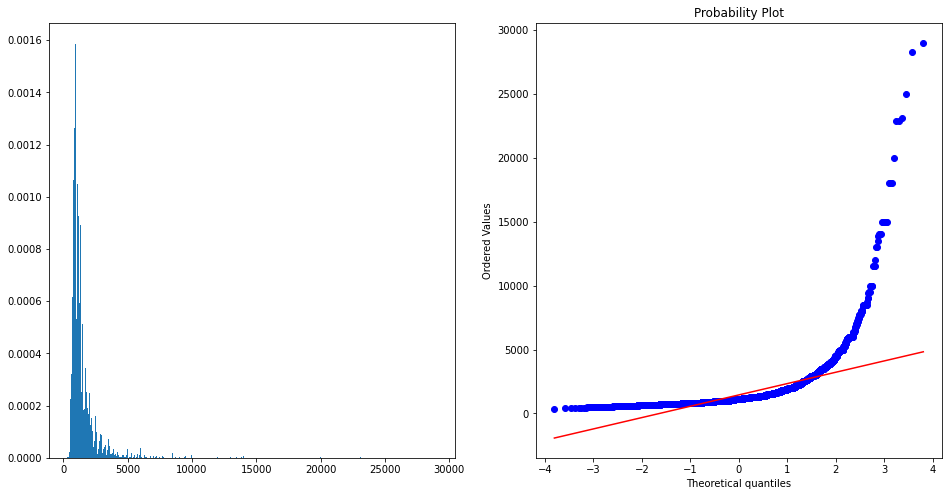

In [366]:
from scipy import stats

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1, 2, 1)
ax.hist(apartments.price, 500, density=True)

ax = fig.add_subplot(1, 2, 2)
stats.probplot(apartments.price, dist='norm', plot=plt)
pass

A simple vista, no sembla que la variable __price__ segueixi una distribució normal. Per tal de comprovar-ho, portarem a terme la prova de Kolmogorov-Smirnov. El motiu de portar a terme aquesta prova i no la de Shapiro-Wilk, és perquè amb la implementació de Scipy, per un nombre de mostres superior a 5000, el p-value pot no esser precís.

In [367]:
stats.kstest(apartments.price, 'norm', args=(apartments.price.mean(), apartments.price.std()))

KstestResult(statistic=0.24484544125865293, pvalue=0.0)

Podem veure que el p-value és 0 en el nostre cas, més petit que el valor de significació escollit: 0.05. Per tant podem rebutjar la hipòtesi nul·la i concloure que la variable __price no segueix una distribució normal__.

### Comprovació de l'homoscedasticitat de la variable price per als diferents grups

Per comprovar l'homoscedasticitat de la variable __price__ per als diferents grups que volem comparar, emprarem el test de Fligner-Killeen, ja que prèviament hem observat que aquesta variable no segueix una distribució normal.

#### Homoscedasticitat dels preus dels barris

In [368]:
neighbourhood_grouped_samples = apartments.groupby('neighbourhood')['price'].apply(pd.Series.tolist).tolist()
stats.fligner(*neighbourhood_grouped_samples)

FlignerResult(statistic=2111.855406114203, pvalue=0.0)

Donat el p-value és < 0.05 (el valor de significació escollit), podem concloure doncs que __price__ presenta variàncies estadísticament diferents entre els barris de Barcelona.

#### Homoscedasticitat dels preus de les agències

In [369]:
realestate_grouped_samples = apartments.groupby('realestate')['price'].apply(pd.Series.tolist).tolist()
stats.fligner(*realestate_grouped_samples)

FlignerResult(statistic=3503.2652150704203, pvalue=1.3734179778945182e-260)

Donat que el p-value és < 0.05 (el valor de significació escollit), podem concloure que __price__ presenta variàncies estadísticament diferents entre les agències immoniliaries.

### Comprovació de mitjanes de la variable price per als diferents grups

Ja hem vist com la variable __price__ no segueix una distribució normal, i com per als grups que es volen analitzar, la variància de __price__ entre ells presenta diferències estadísticament significants. Donat tot això, haurem d'emprar proves no paramètriques, en concret el test de Kruskal-Wallis, per tal de saber si la mitjana entre els diferents grups (que són més de dos tant en el cas dels barris com en el cas de les agències) presenta diferències estadísticament significants.

#### Comparació de mitjanes de preus entre els diferents barris

In [370]:
stats.kruskal(*neighbourhood_grouped_samples)

KruskalResult(statistic=2644.2441409847634, pvalue=0.0)

Donat que el p-value és < 0.05 (el valor de significació escollit), podem concloure que hi ha difències de preu estadísticament significatives entre els barris de Barcelona.

#### Comparació de mitjanes de preus entre les diferents agències

In [371]:
stats.kruskal(*realestate_grouped_samples)

KruskalResult(statistic=4897.200567356908, pvalue=0.0)

Donat que el p-value és < 0.05 (el valor de significació escollit), podem concloure que hi ha diferències de preu estadísticament significatives entre les ofertes de les diferents agències.

### Model de regressió:

Anem a construïr un mode de regressió lineal que ens permeti fer prediccions sobre el preu dels habitatges. Per fer això, primer haure de fer unes tranformacions a les dades, per que siguin manejables.

#### Codificació de les variables quantitatives
En un model de regressió no podem treballar directament amb dades categóriques. Hem de codificar-les per poder-les incloure en el nostre model. Optarem per One-Hot-Encoding, que ens permet introduïr variables dummy per cada una de les categòries d'una variable.


In [372]:
apartments.realestate.value_counts()

ENGEL & VOELKERS                         836
Homelike                                 760
APROPERTIES REAL ESTATE Nº Aicat 6388    481
SH BARCELONA                             381
AREA CASA                                332
                                        ... 
ARQUINVEST                                 1
A Tocar de Mar Serveis Immobiliaris        1
VAdPISOS                                   1
PUNTO BELLVITGE                            1
Ignacio                                    1
Name: realestate, Length: 1052, dtype: int64

Veiem que per la variable realestate tenim moltes categóries. Per reduir-ne el número, les classificarem segons el nombre d'habitatges que posen en lloguer. Anem a veure com es distribuexi la quantitat d'habitatges que té cada immobiliària.

In [373]:
counts_realestate = apartments.realestate.value_counts().to_frame().reset_index()
counts_realestate.columns = ['realestate', 'counts']

counts_realestate.describe()

,counts
count,1052.000000
mean,9.295627
std,42.837745
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,836.000000


<AxesSubplot:>

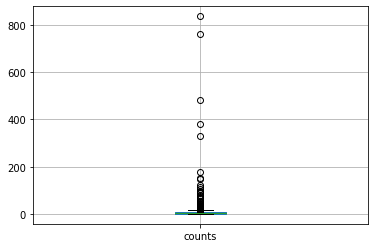

In [374]:
counts_realestate.boxplot()

Explorant les dades hem vist que TECNOCASA apareix disgregada en diferents oficines. Comencem per assignar-li la mateixa immobiliària

In [375]:
counts_realestate[counts_realestate.realestate.astype(str).str.contains('TECNOCASA')]

,realestate,counts
57,TECNOCASA RIERA ALTA MAR,24
120,TECNOCASA - ESTUDI AVINGUDA DE ROMA,13
193,TECNOCASA,9
366,TECNOCASA - ESTUDI MARINA 311,4
422,TECNOCASA-ESTUDI GRAN DE SANT ANDREU,4
437,TECNOCASA - HOME GUINARDO,3
467,TECNOCASA - PROJECTE LA PROSPERITAT,3
479,TECNOCASA AVDA. MISTRAL,3
502,TECNOCASA - PISOS BORNE MAR,3
622,TECNOCASA ESTUDI MERIDIANA,2


In [376]:
apartments.loc[apartments.realestate.astype(str).str.contains('TECNOCASA'),'realestate'] = 'TECNOCASA'
counts_realestate = apartments.realestate.value_counts().to_frame().reset_index()
counts_realestate.columns = ['realestate', 'counts']

Farem la suposició on tots aquells valors de realstate que només tinguin un habitatge els etiquetarem com a porpietaris particulars.

In [377]:
particulars = counts_realestate[counts_realestate.counts==1].realestate
apartments.loc[apartments.realestate.isin(particulars),"realestate_size"] = 'Particular'

Entre 2 i 10, els classificarem com a petits propietaris.

In [378]:
petits_propietaris = counts_realestate[np.logical_and(counts_realestate.counts>1, counts_realestate.counts<=10)].realestate
apartments.loc[apartments.realestate.isin(petits_propietaris),"realestate_size"] = 'Petit'

Entre 11 i 50 els classificarem com a propietaris mitjans.

In [379]:
mitja = counts_realestate[np.logical_and(counts_realestate.counts>10, counts_realestate.counts<=50)].realestate
apartments.loc[apartments.realestate.isin(mitja),"realestate_size"] = 'Mitja'

Més de 50 i menys de 300 com a grans propietaris

In [380]:
grans = counts_realestate[np.logical_and(counts_realestate.counts>50, counts_realestate.counts<=300)].realestate
apartments.loc[apartments.realestate.isin(grans),"realestate_size"] = 'Grans'

Més de 300, com a molt grans proietaris.

In [381]:
molt_grans = counts_realestate[counts_realestate.counts>300].realestate
apartments.loc[apartments.realestate.isin(molt_grans),"realestate_size"] = 'Molt grans'

Hem simplificat notablement la informació sobre les immobiliàries. Ara preparem el dataset amb les variables que es poden ser útils. 

In [442]:
apartments.realestate_size.astype('category')
apartments.realestate_size.value_counts()
apartments_regression = apartments.drop(columns=['realestate','building_type','latitude','longitude','link','neighb_meanprice'])
apartments_regression

,bathrooms,building_subtype,conservation_state,discount,floor_elevator,is_new_construction,price,rooms,sqft_m2,neighbourhood,realestate_size
0,1,Study,3.0,0,True,False,320.0,0,15,sant antoni,Petit
2,1,Flat,2.0,0,False,False,400.0,2,63,el turó de la peira,Petit
3,1,Study,2.0,0,True,False,430.0,0,17,hostafrancs,Petit
4,2,Flat,3.0,0,True,False,450.0,1,29,la marina de port,Petit
5,1,Apartment,3.0,0,False,False,450.0,0,25,sant antoni,Petit
...,...,...,...,...,...,...,...,...,...,...,...
12149,1,Apartment,-1.0,0,False,False,22839.0,2,54,hostafrancs,Molt grans
12150,2,Apartment,-1.0,0,False,False,23092.0,3,85,la nova esquerra de l'eixample,Molt grans
12151,21,CountryHouse,1.0,30000,False,False,25000.0,21,2500,la font d'en fargues,Molt grans
12152,7,Apartment,-1.0,0,False,False,28279.0,8,550,la font d'en fargues,Molt grans


Ara codifiquem les variables:

In [443]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_labels = apartments_regression.select_dtypes(include=['object', 'category','bool']).columns.to_list()
numeric_labels = apartments_regression.select_dtypes(include=['float64', 'int']).columns.to_list()


preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), cat_labels)],
                    remainder='passthrough'
               )

apartments_regression_cod = preprocessor.fit_transform(apartments_regression)

cat_labels_encoded = preprocessor.named_transformers_['encoder'].get_feature_names(cat_labels)

new_labels = np.concatenate([cat_labels_encoded,numeric_labels])

apartments_regression_cod = pd.DataFrame(apartments_regression_cod.todense(), columns=new_labels)
apartments_regression_cod

,building_subtype_Apartment,building_subtype_Attic,building_subtype_CountryHouse,building_subtype_Duplex,building_subtype_Flat,building_subtype_GroundFloorWithGarden,building_subtype_House_Chalet,building_subtype_Loft,building_subtype_SemiDetached,building_subtype_SemidetachedHouse,...,realestate_size_Grans,realestate_size_Mitja,realestate_size_Molt grans,realestate_size_Particular,realestate_size_Petit,bathrooms,discount,price,rooms,sqft_m2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,320.0,0.0,15.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,400.0,2.0,63.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,430.0,0.0,17.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,450.0,1.0,29.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,450.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22839.0,2.0,54.0
9775,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,23092.0,3.0,85.0
9776,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,21.0,30000.0,25000.0,21.0,2500.0
9777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,7.0,0.0,28279.0,8.0,550.0


In [444]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from statsmodels.api import OLS
import statsmodels.api as sm


X = apartments_regression_cod.drop(columns = 'price')
y = apartments_regression_cod['price']
reg = OLS(y,X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     157.8
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:24:29   Log-Likelihood:                -79478.
No. Observations:                9779   AIC:                         1.591e+05
Df Residuals:                    9688   BIC:                         1.598e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
building_subtype_Apartment                                  1954.5793    140.223     13.939      0.000    1679.714    2229.445
building_subtype_Attic                                      1863.3840    142.712     13.057      0.000    1583.639    2143.129
building_subtype_CountryHouse                              -1.827e+04   1369.532    -13.337      0.000    -2.1e+04   -1.56e+04
building_subtype_Duplex                                     1565.3389    149.884     10.444      0.000    1271.535    1859.142
building_subtype_Flat                                       1532.9620    139.023     11.027      0.000    1260.447    1805.477
building_subtype_GroundFloorWithGarden                      1637.7469    181.851      9.006      0.000    1281.281    1994.213
building_subtype_House_Chalet                               2141.5492    165.049     12.975      0.000    1818.019    2465.079
building_subtype_Loft                                       1729.5444    151.448     11.420      0.000    1432.674    2026.414
building_subtype_SemiDetached                               2580.6474    372.427      6.929      0.000    1850.613    3310.682
building_subtype_SemidetachedHouse                          1019.4834    255.915      3.984      0.000     517.836    1521.131
building_subtype_Study                                      1559.0881    156.706      9.949      0.000    1251.911    1866.265
conservation_state_-1.0                                      -49.3094     59.112     -0.834      0.404    -165.182      66.563
conservation_state_1.0                                       -16.1707     60.518     -0.267      0.789    -134.798     102.457
conservation_state_2.0                                       -59.5955     61.079     -0.976      0.329    -179.324      60.133
conservation_state_3.0                                       -96.9238     61.508     -1.576      0.115    -217.492      23.644
conservation_state_4.0                                      -416.6494    227.383     -1.832      0.067    -862.368      29.069
conservation_state_8.0                                       -42.5963    229.965     -0.185      0.853    -493.376     408.184
floor_elevator_False                                        -322.2487     58.302     -5.527      0.000    -436.532    -207.965
floor_elevator_True                                         -358.9965     59.663     -6.017      0.000    -475.949    -242.044
is_new_construction_False                                  -1010.0573     63.633    -15.873      0.000   -1134.792    -885.323
is_new_construction_True                                     328.8122     79.032      4.161      0.000     173.894     483.730
neighbourhood_can baró             

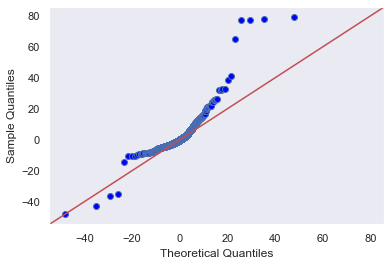

In [445]:
import scipy.stats as stats
res = reg.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()



### Regessió amb arbre

In [448]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sb; 


X = apartments_regression_cod.drop(columns = 'price')
y = apartments_regression_cod['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = GradientBoostingRegressor()

model.fit(X_train, y_train)

GradientBoostingRegressor()

In [449]:
accuracy = model.score(X_test, y_test)

print("El model té una precisió pel conjunt de test de: "+str(round(accuracy*100,2))+"%")

El model té una precisió pel conjunt de test de: 62.79%


### Classificació sobre preu inflat